# 1 Python (done)

###### 1. Чем отличаются $list$ и $tuple$? Что из них можно использовать в качестве ключа в $dict$ и добавлять в $set$? Почему? На какой структуре данных реализован $dict$ в $python$? Чем оличаются $range$ от $xrange$ в $Python 2.x$? Что такое $list$ $comprehension$? Как работают функции $map$ и $reduce$ в $Python$?

$List$ - изменяемый тип данных, $tuple$ - неизменяемый. $Tuple$ можно использовать в качестве ключа для $dict$ и добавлять в $set$, так как $dict$ и $set$ используют хэш-функцию. $Dict$ - это хеш-таблица.

$Range$ в $Python 2.x$ возвращает $list$, а $xrange$ - генератор, создает объект $xrange$. Производит те же элементы, что и $range$, но не сохраняет их

$List$ $comprehension$ - генератор для создания массивов.

$map()$ - это функция, принимающая аргументами другую функцию одного аргумента и массив. Возвращаемым значеним $map()$ является итератор по массиву, образованному из первоначального применением функции ко всем его элементам. 

Функция $reduce()$ имеет те же аргументы, как и $map()$, последовательно применяет функцию к элементам массива, а на выходе получается одно значение.

###### 2. Напишите рекурсивную функцию, возвращающую N-e число Фибоначчи. Проверьте работу для небольших N. Выясните, для какого N начинаются проблемы с глубиной рекурсии. Измерьте время выполнения функции.

In [2]:
def fib(n):
    if n == 0 or n == 1:
        return 1
    else:
        return fib(n-1) + fib(n-2)
def fib2(n):
    arr_fib = [0, 1]
    if n == 0 or n == 1:
        return 1
    else:
        for i in range(n-1):
            arr_fib.append(arr_fib[i] + arr_fib[i+1])
    return arr_fib[-1]      

In [3]:
%%timeit
fib(2)

483 ns ± 14.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [4]:
%%timeit
fib(8)

11.7 µs ± 106 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [5]:
%%timeit
fib2(8)

1.71 µs ± 13.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [6]:
%%timeit
fib(32)

1.23 s ± 18 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
%%timeit
fib2(32)

6.2 µs ± 276 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


###### 4. Напишите функцию, возвращающую модуль и аргумент комплексного числа по заданной мнимой и действительной части. Какой тип возвращаемого значения? 

In [8]:
import math

In [9]:
def cmplx_mod_arg(real, imagine):
    cmplx_mod = (real**2 + imagine**2)**0.5
    float_equality_threshold = 10e-9
    if(real <= float_equality_threshold):
        if (imagine > 0):
            cmplx_arg = math.pi * (1/2)
        else:
            cmplx_arg = math.pi * (3/2)
    else:
        cmplx_arg = math.atan(imagine/real)    
    return cmplx_mod, cmplx_arg

In [10]:
a = cmplx_mod_arg(1, 1)
a

(1.4142135623730951, 0.7853981633974483)

In [11]:
type(a)

tuple

###### 5. Напишите $docstrings$ к вашей последней функции. Проверьте, что написанные в $docstrings$ примеры выполняются, без явного копирования кода оттуда.

In [12]:
import doctest

In [13]:
def cmplx_mod_arg(real, imagine):
    """Returns the absolut value and the argument of complex number
    with given real and imaginary parts.

    If the result is small enough to fit in an int, return an int.
    Else return a long.

    >>> cmplx_mod_arg(0, 4)
    (4.0, 1.5707963267948966)
    >>> cmplx_mod_arg(0, 10)
    (10.0, 1.5707963267948966)
    >>> cmplx_mod_arg(4, 0)
    (4.0, 0.0)
    >>> cmplx_mod_arg(0, -30)
    (30.0, 4.71238898038469)
    """
    cmplx_mod = (real**2 + imagine**2)**0.5
    float_equality_threshold = 10e-9
    if(real <= float_equality_threshold):
        if (imagine > 0):
            cmplx_arg = math.pi * (1/2)
        else:
            cmplx_arg = math.pi * (3/2)
    else:
        cmplx_arg = math.atan(imagine/real)    
    return cmplx_mod, cmplx_arg

In [14]:
doctest.testmod()

TestResults(failed=0, attempted=4)

###### 6. Реализуйте класс комплексных чисел с самым базовым функционалом.

In [15]:
class cmplx(object):
    def __init__(self, real, imagine):
        self.real = real
        self.imagine = imagine
        
    def add(self, another_complex):
        x = self.real + another_complex.real
        y = self.imagine + another_complex.imagine
        return cmplx(x, y)
    
    def subtract(self, another_complex):
        x = self.real - another_complex.real
        y = self.imagine -another_complex.imagine
        return cmplx(x, y)
    
    def multiply(self, another_complex):
        x = self.real * another_complex.real - self.imagine * another_complex.imagine
        y = self.real * another_complex.imagine + self.imagine * another_complex.real
        return cmplx(x, y)

    def divide(self, another_complex):
        denominator = another_complex.real**2 + another_complex.imagine**2
        x = (self.real * another_complex.real + self.imagine * another_complex.imagine)/denominator
        y = (another_complex.real * self.imagine - self.real * another_complex.imagine)/denominator
        return cmplx(x, y)
    
    def __str__(self):
        if(self.imagine < 0):
            answer = "{0} - {1}*i".format(self.real, -self.imagine)
        if(self.imagine > 0):
            answer = "{0} + {1}*i".format(self.real, self.imagine)
        if(self.imagine == -1):
            answer = "{0} - i".format(self.real)
        if(self.imagine == 1):
            answer = "{0} + i".format(self.real)
        if(self.imagine == 0):
            answer = "{0}".format(self.real)
        if(self.real == 0):
            answer = "{0}*i".format(self.imagine)
        if((self.real == 0) & (self.imagine == 0)):
            answer = "0"    
        return answer    

In [16]:
a = cmplx(7,4)
b = cmplx(3,2)

In [17]:
print(a)

7 + 4*i


In [18]:
print(a.add(b))
print(a.subtract(b))
print(a.multiply(b))
print(a.divide(b))

10 + 6*i
4 + 2*i
13 + 26*i
2.230769230769231 - 0.15384615384615385*i


###### 7. Напишите кэширующего декоратора и декоратора, вычисляющего время работы функции. Попробуйте применить эти декораторы в разной последовательности к функции, вычисляющей числа Фибоначчи, сравнить и объяснить результаты. Объясните также, как работают использованные вами декораторы.

In [19]:
def timer(f):
    import time
    def tmp(*args, **kwargs):
        t = time.time()
        res = f(*args, **kwargs)
        print("Время выполнения функции %s: %f" % (str(f), (time.time()-t)))
        return res

    return tmp

def memoized(f):
    memory = {}
    def wrapper(*args, **kwargs):
        key = (tuple(args), hash(tuple(sorted(kwargs.items()))))
        if not key in memory:
            memory[key] = f(*args, **kwargs)
        return memory[key]
    
    return wrapper

In [20]:
@memoized
@timer
def fib(n):
    if n == 0 or n == 1:
        return 1
    else:
        return fib(n-1) + fib(n-2)

In [21]:
fib(20)

Время выполнения функции <function fib at 0x00000213BDC2E510>: 0.000000
Время выполнения функции <function fib at 0x00000213BDC2E510>: 0.000000
Время выполнения функции <function fib at 0x00000213BDC2E510>: 0.000000
Время выполнения функции <function fib at 0x00000213BDC2E510>: 0.000000
Время выполнения функции <function fib at 0x00000213BDC2E510>: 0.000000
Время выполнения функции <function fib at 0x00000213BDC2E510>: 0.000000
Время выполнения функции <function fib at 0x00000213BDC2E510>: 0.000000
Время выполнения функции <function fib at 0x00000213BDC2E510>: 0.001002
Время выполнения функции <function fib at 0x00000213BDC2E510>: 0.001002
Время выполнения функции <function fib at 0x00000213BDC2E510>: 0.001002
Время выполнения функции <function fib at 0x00000213BDC2E510>: 0.001002
Время выполнения функции <function fib at 0x00000213BDC2E510>: 0.001002
Время выполнения функции <function fib at 0x00000213BDC2E510>: 0.001002
Время выполнения функции <function fib at 0x00000213BDC2E510>: 0

10946

In [23]:
fib(20)

10946

При подсчете функции в первый раз вызываются функции для подсчета всех факториалов от 0 до 20. Декоратор подсчета времени вызывается каждый раз при вызове функции с новым для декоратора memorized аргументом.
Считая факториал во второй раз, получим уже посчитанное значение, причем, так как обернутая в memorized функция не вызывается, декоратор подсчета времени не отрабатывает.

In [24]:
@timer
@memoized
def fib(n):
    if n == 0 or n == 1:
        return 1
    else:
        return fib(n-1) + fib(n-2)

In [25]:
fib(20)

Время выполнения функции <function memoized.<locals>.wrapper at 0x00000213BDC2E8C8>: 0.000000
Время выполнения функции <function memoized.<locals>.wrapper at 0x00000213BDC2E8C8>: 0.001013
Время выполнения функции <function memoized.<locals>.wrapper at 0x00000213BDC2E8C8>: 0.001013
Время выполнения функции <function memoized.<locals>.wrapper at 0x00000213BDC2E8C8>: 0.000000
Время выполнения функции <function memoized.<locals>.wrapper at 0x00000213BDC2E8C8>: 0.001013
Время выполнения функции <function memoized.<locals>.wrapper at 0x00000213BDC2E8C8>: 0.000000
Время выполнения функции <function memoized.<locals>.wrapper at 0x00000213BDC2E8C8>: 0.001013
Время выполнения функции <function memoized.<locals>.wrapper at 0x00000213BDC2E8C8>: 0.000000
Время выполнения функции <function memoized.<locals>.wrapper at 0x00000213BDC2E8C8>: 0.001013
Время выполнения функции <function memoized.<locals>.wrapper at 0x00000213BDC2E8C8>: 0.000000
Время выполнения функции <function memoized.<locals>.wrapper

10946

In [26]:
fib(20)

Время выполнения функции <function memoized.<locals>.wrapper at 0x00000213BDC2E8C8>: 0.000000


10946

Количество напечатанных строчек со временем работы увеличилось, т. к. теперь обернутый в memorized fib(n) может вызваться максимум 2 раза, и время будет считаться для двух вызовов

###### 8. Выясните, чем отличается задание поля x через "self.x =" от объявления метода с декоратором property. 

В первом случае создается поле с доступом на чтение и изменение, а во втором случае только на чтение. Изменение артрибута, заданного через $@property$ возможно только косвенно, через изменение параметров класса, от которых зависит $@property$

###### 9. Напишите setter и getter для полей класса комплексного числа

In [27]:
class cmplx(object):
    def __init__(self, real, imagine):
        self.real = real
        self.imagine = imagine
        
    def add(self, another_complex):
        x = self.real + another_complex.real
        y = self.imagine + another_complex.imagine
        return cmplx(x, y)
    
    def subtract(self, another_complex):
        x = self.real - another_complex.real
        y = self.imagine -another_complex.imagine
        return cmplx(x, y)
    
    def multiply(self, another_complex):
        x = self.real * another_complex.real - self.imagine * another_complex.imagine
        y = self.real * another_complex.imagine + self.imagine * another_complex.real
        return cmplx(x, y)

    def divide(self, another_complex):
        denominator = another_complex.real**2 + another_complex.imagine**2
        x = (self.real * another_complex.real + self.imagine * another_complex.imagine)/denominator
        y = (another_complex.real * self.imagine - self.real * another_complex.imagine)/denominator
        return cmplx(x, y)
    
    @property
    def real(self):
        return self.__real
    
    @property
    def imagine(self):
        return self.__imagine
    
    @real.setter
    def real(self, value):
        if isinstance(value, int):
            self.__real = float(value)
        elif isinstance(value, float):
            self.__real = int(value)
        else:
            raise TypeError("wrong type for complex number field") 
    
    @imagine.setter
    def imagine(self, value):
        if isinstance(value, int):
            self.__imagine = float(value)
        elif isinstance(value, float):
            self.__imagine = int(value)
        else:
            raise TypeError("wrong type for complex number field") 
    
    def __str__(self):
        if(self.imagine < 0):
            answer = "{0} - {1}*i".format(self.real, -self.imagine)
        if(self.imagine > 0):
            answer = "{0} + {1}*i".format(self.real, self.imagine)
        if(self.imagine == -1):
            answer = "{0} - i".format(self.real)
        if(self.imagine == 1):
            answer = "{0} + i".format(self.real)
        if(self.imagine == 0):
            answer = "{0}".format(self.real)
        if(self.real == 0):
            answer = "{0}*i".format(self.imagine)
        if((self.real == 0) & (self.imagine == 0)):
            answer = "0"    
        return answer    

# 2 urllib.request + BeautifulSoup

###### Скачайте $html$-код страницы с новостью с любого новостного сайта и, распарсив его с помощью библиотеки $Beautiful$ $Soup$, получите текст статьи (без $html$-тегов или вкраплений $java-script$) 

In [28]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [29]:
URL = "https://www.bbc.com/news/entertainment-arts-46481907"
page = urlopen(URL)
soup = BeautifulSoup(page, "html.parser")

In [30]:
soup('p')

[<p style="position: absolute; top: -999em"><img alt="" height="1" src="https://sa.bbc.co.uk/bbc/bbc/s?name=news.entertainment_and_arts.story.46481907.page&amp;ml_name=webmodule&amp;ml_version=-1&amp;blq_e=orbit&amp;blq_r=orbit&amp;blq_s=orbit&amp;blq_v=default&amp;language=en&amp;pal_route=asset&amp;language=en-GB&amp;pal_webapp=tabloid&amp;prod_name=news&amp;app_name=news&amp;cps_asset_id=46481907&amp;page_type=Story§ion=%2Fnews%2Fentertainment_and_arts&amp;first_pub=2018-12-07T11%3A46%3A27%2B00%3A00&amp;last_editorial_update=2018-12-07T18%3A02%3A45%2B00%3A00&amp;curie=e7b86d27-1e79-0841-b866-f9bb237bf439&amp;title=XXXTentacion%27s+posthumous+album+Skins+is+released&amp;has_video=&amp;topic_names=Kanye+West%21XXXTentacion+death%21Music&amp;topic_ids=c256n7nw2g4t%21cpz7wxdzkr2t%21cz4pr2gd872t&amp;for_nation=ru&amp;app_version=1.268.0&amp;app_type=responsive&amp;bbc_site=news&amp;blq_js_enabled=0" width="1"/></p>,
 <p aria-hidden="true" class="twite__title">Share this with</p>,
 <p ari

In [31]:
title = soup.html.head.title.string
sub_title = soup.find("p", attrs={"class": "story-body__introduction"})
article_body = soup.findAll("p", attrs={"class": None, "style": None})

article = title + "\n\n"
article += sub_title.text.strip() + "\n\n" 

for paragraph in article_body:
    article += (paragraph.text.strip() + "\n\n")
       
print(article)

XXXTentacion's posthumous album Skins is released - BBC News

A posthumous XXXTentacion album has been released, almost six months after the controversial rapper was shot dead.

Skins features 10 tracks - including a single, One Minute, featuring Kanye West - but is only 19 minutes long.

XXXTentacion was shot and killed in Florida in June at the age of 20.

Skins becomes the rapper's third studio album and follows ?, which debuted at number one on the US Billboard 200 in March and has reached platinum status since his death.

XXXTentacion's personal life was plagued by allegations of domestic violence. He was facing 15 felony charges at the time of his death, including aggravated battery of a pregnant woman, domestic battery by strangulation and witness tampering.

In October, audio emerged of the rapper apparently admitting to assaulting his ex-girlfriend and stabbing nine people.

Despite its title, the Kanye West track is the longest on the new album, clocking in at three minutes, 

# 3 NumPy (done)

###### 1. Создайте $numpy.ndarray$ размерностью $3*4*2$ и продемонстрируйте разные способы обращения по индексам из документации $NumPy$.

In [32]:
import numpy as np

In [47]:
a = np.random.randint(9, size=(3, 4, 2))
a

array([[[6, 8],
        [5, 3],
        [6, 5],
        [7, 2]],

       [[5, 3],
        [7, 8],
        [0, 0],
        [3, 6]],

       [[1, 0],
        [7, 1],
        [4, 4],
        [5, 3]]])

In [48]:
print(a.item(12))
print(a.item((1,1,1)))

0
8


In [49]:
np.take(a, [0, 1, 4])

array([6, 8, 6])

In [50]:
a[1][2][-2]

0

In [51]:
a[:,3,1]

array([2, 6, 3])

In [52]:
a[1,1]

array([7, 8])

In [53]:
a[2][3]

array([5, 3])

In [54]:
a[(0, 1), (0, 1), (0, 1)] 

array([6, 8])

In [55]:
a[0:2,::]

array([[[6, 8],
        [5, 3],
        [6, 5],
        [7, 2]],

       [[5, 3],
        [7, 8],
        [0, 0],
        [3, 6]]])

In [56]:
a[(2,1)]

array([7, 1])

In [57]:
a[:,2]

array([[6, 5],
       [0, 0],
       [4, 4]])

In [58]:
a[:2]

array([[[6, 8],
        [5, 3],
        [6, 5],
        [7, 2]],

       [[5, 3],
        [7, 8],
        [0, 0],
        [3, 6]]])

In [59]:
a[1, ...]

array([[5, 3],
       [7, 8],
       [0, 0],
       [3, 6]])

In [60]:
a[0], a[1], a[2], a[-1]

(array([[6, 8],
        [5, 3],
        [6, 5],
        [7, 2]]), array([[5, 3],
        [7, 8],
        [0, 0],
        [3, 6]]), array([[1, 0],
        [7, 1],
        [4, 4],
        [5, 3]]), array([[1, 0],
        [7, 1],
        [4, 4],
        [5, 3]]))

In [61]:
a[0:3]

array([[[6, 8],
        [5, 3],
        [6, 5],
        [7, 2]],

       [[5, 3],
        [7, 8],
        [0, 0],
        [3, 6]],

       [[1, 0],
        [7, 1],
        [4, 4],
        [5, 3]]])

In [62]:
a[[0, 2, -1]]

array([[[6, 8],
        [5, 3],
        [6, 5],
        [7, 2]],

       [[1, 0],
        [7, 1],
        [4, 4],
        [5, 3]],

       [[1, 0],
        [7, 1],
        [4, 4],
        [5, 3]]])

###### 2. Попробуйте сравнить по производительности $numpy.array$ и $list$, выполняя какую-то стандартную операцию с каждым из типов много раз.

In [63]:
a = list(range(10000))
b = list(range(10000))

In [64]:
%%timeit
c = [x*y for x, y in zip(a, b)]

705 µs ± 12.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [65]:
a = np.array(a)
b = np.array(b)

In [66]:
%%timeit
c = a * b

10.3 µs ± 124 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [67]:
%%timeit
c = [x*y for x, y in zip(a, b)]

1.67 ms ± 31.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


###### 3. Изучите $numpy.linspace()$, напишите свою реализацию аналогичной функции с помощью $list$ $comprehension$, дающую тот же результат, только в виде $list$. Сравните по производительности два варианта на достаточно больших массивах.

In [68]:
def linspace(start, stop, num = 50):
    step = (stop - start)/(num - 1)
    return [start + i*step for i in range(num)]

In [69]:
%%timeit
a = linspace(0, 1, 1000000)

147 ms ± 2.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [70]:
%%timeit
b = np.linspace(0, 1, 1000000)

5.06 ms ± 138 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# 4 Matplotlib (done)

###### 1. Что делает в IPython Notebook команда \%$matplotlib$ $inline$?

С помощью этого бэкэнда вывод команд построения отображается в виде строки внутри интерфейсов, таких как блокнот Jupyter, непосредственно под кодовым элементом, который его создал. Полученные графики также будут сохранены в документе ноутбука.

###### 2. Используя $numpy.linspace$ и генераторы, постройте в $matplotlib$ график какой-нибудь элементарной функции.

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

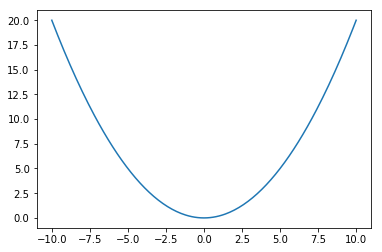

In [72]:
x = np.linspace(-10, 10, 201)
y = [0.2*j**2 for j in x]
plt.plot(x,y)
plt.show()

###### 3. Постройте графики еще нескольких элементарных функций (на том же рисунке) и сделайте к ним подписи с формулами. Добавьте подписи к осям координат и название графика. Сохраните изображение в файл одной строчкой на Python.

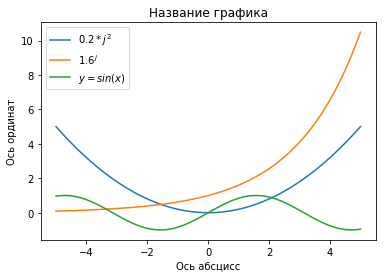

In [73]:
x = np.linspace(-5, 5, 101)
a = [0.2*j**2 for j in x]
b = [1.6**j for j in x]
c = np.sin(x)
plt.title('Название графика')
plt.xlabel('Ось абсцисс')
plt.ylabel('Ось ординат')
plt.plot(x,a, label = '$0.2*j^2$')
plt.plot(x,b, label = '$1.6^j$')
plt.plot(x,c, label = '$y = sin(x)$')
plt.legend(loc=2)
#plt.show()
plt.savefig('plot.png')

###### 4. Постройте на одном изображении $4$ системы координат, на верхних двух квадратичную и кубическую параболы, на нижних экспоненту и логарифм.

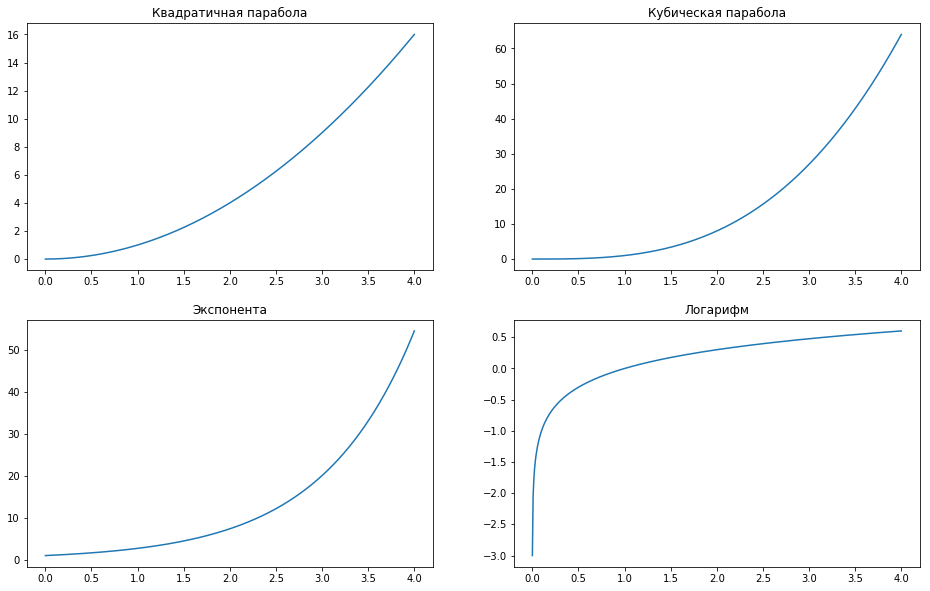

In [74]:
plt.figure(figsize=(16,10))

X = np.linspace(0.001, 4, 500)

plt.subplot(221)
plt.plot(X, [x**2 for x in X])
plt.title('Квадратичная парабола')

plt.subplot(222)
plt.plot(X, [x**3 for x in X])
plt.title('Кубическая парабола')

plt.subplot(223)
plt.plot(X, [np.exp(x) for x in X])
plt.title('Экспонента')

plt.subplot(224)
plt.plot(X, [math.log10(x) for x in X])
plt.title('Логарифм')

plt.show()

###### 5. Изобразите $heatmap$ для функции $f(x,y) = 3xy + x - 2y$ в области $[0; 5]^2$.

In [75]:
import seaborn as sns

In [76]:
f = np.zeros((6, 6))
for i in range(6):
    for j in range(6):
        f[j][i] = 3.*i*j + i - 2*j 

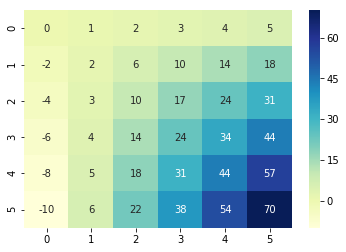

In [77]:
ax = sns.heatmap(f, annot = True, cmap="YlGnBu")

###### 6. Постройте трехмерный график той же функции в той же области.

In [78]:
from mpl_toolkits import mplot3d

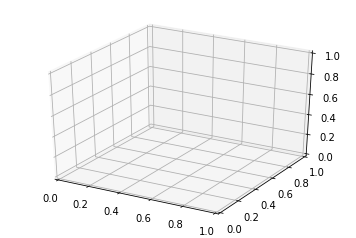

In [79]:
fig = plt.figure()
ax = plt.axes(projection='3d')

Text(0.5,0,'z')

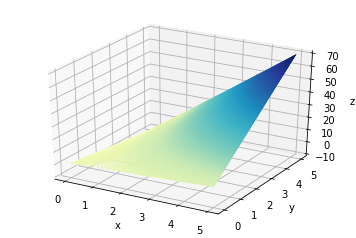

In [80]:
def f(x, y):
    return 3*x*y + x - 2*y

x = np.linspace(0, 5, 51)
y = np.linspace(0, 5, 51)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 500, cmap='YlGnBu')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

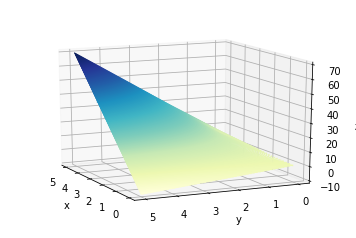

In [81]:
ax.view_init(15, 155)
fig

# 5 Всё вместе + SciPy (done)

######  Сгенерируйте $500$ точек, удовлетворяющих зависимости $y = x^3 + 2x^2 -3x+2$, затем добавьте  к координатам $y$ нормальный шум. Восстановите исходную зависимость, считая известной степень полинома. У восстановленной зависимости найдите экстремумы. Покажите на графике исходные точки, восстановленную зависимость и  найденные экстремумы.

In [82]:
from scipy import optimize

In [83]:
x = np.linspace(-3,3,500)
y = x**3 + 2*x**2 - 3*x + 2 + np.random.normal(0, 1, size = 500)

In [84]:
z = np.polyfit(x, y, 3)
z

array([ 1.00722597,  2.00288348, -3.02801079,  2.05646578])

In [85]:
def f(x):
    return z[0]*x**3 + z[1]*x**2 + z[2]*x + z[3]
def negative_f(x):
    return -f(x)

In [86]:
minimum = optimize.fminbound(f, -3., 3.)
maximum = optimize.fminbound(negative_f, -3., 3.)

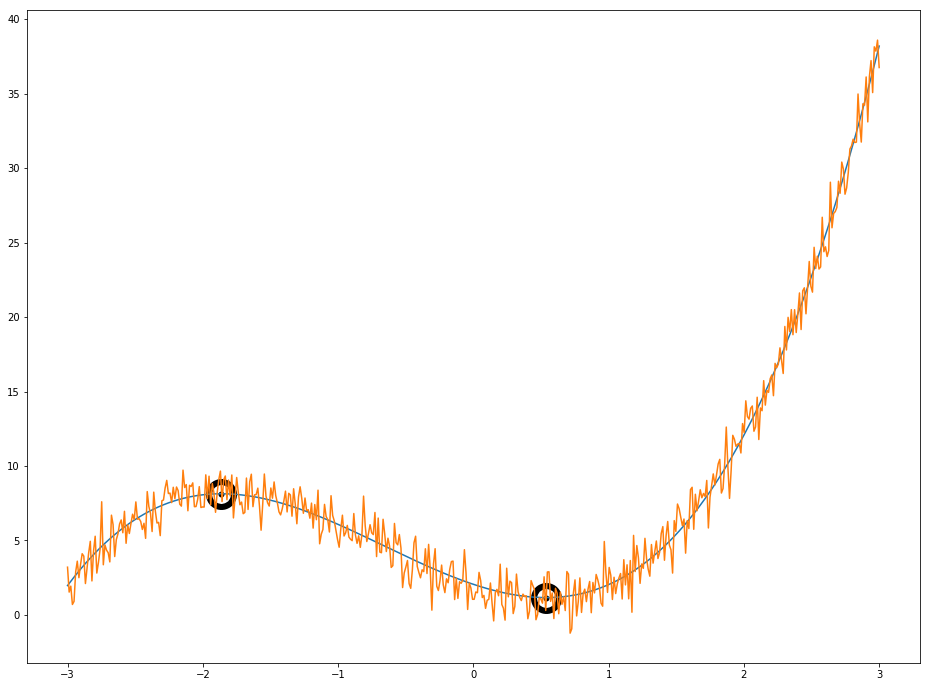

In [87]:
plt.figure(figsize=(16,12))
plt.plot(x,[f(x) for x in x])
plt.scatter(minimum, f(minimum), linewidths=25, c = 'black')
plt.scatter(maximum, f(maximum), linewidths=25, c = 'black')
plt.plot(x,y)
plt.show()

# 6 Pandas + Scikit-learn (done)

###### Считайте выборку про детектирование кожи на фотографиях с помощью pandas. Продемонстрируйте индексацию по строкам и столбцам, $label-based$ и $index-based$. Добавьте в $DataFrame$ столбцы, соответствующие попарным произведениям признаков и модулям попарных разностей. Запустите на исходных и модифицированных признаках $KNeighboursClassifier$, $LogisticRegression$ и $Random$ $Forest$ из $sklearn$ и сравните качество работы каждого метода до и после преобразования признаков.

In [88]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [89]:
data = pd.read_csv("Skin_NonSkin.txt", header=None, names = ['a','b','c','target'], sep='\t')

In [90]:
data.target

0         1
1         1
2         1
3         1
4         1
5         1
6         1
7         1
8         1
9         1
10        1
11        1
12        1
13        1
14        1
15        1
16        1
17        1
18        1
19        1
20        1
21        1
22        1
23        1
24        1
25        1
26        1
27        1
28        1
29        1
         ..
245027    2
245028    2
245029    2
245030    2
245031    2
245032    2
245033    2
245034    2
245035    2
245036    2
245037    2
245038    2
245039    2
245040    2
245041    2
245042    2
245043    2
245044    2
245045    2
245046    2
245047    2
245048    2
245049    2
245050    2
245051    2
245052    2
245053    2
245054    2
245055    2
245056    2
Name: target, Length: 245057, dtype: int64

In [91]:
data.iloc[0]

a          74
b          85
c         123
target      1
Name: 0, dtype: int64

In [92]:
data.iloc[0][3]

1

In [93]:
X = data.drop('target', axis = 1)
y = data.target

In [94]:
data['a_mul_b'] = data.a.multiply(data.b)
data['a_mul_c'] = data.a.multiply(data.c)
data['b_mul_c'] = data.b.multiply(data.c)
data['a_dif_b'] = data.a.subtract(data.b).abs()
data['a_dif_c'] = data.a.subtract(data.c).abs()
data['b_dif_c'] = data.b.subtract(data.c).abs()

In [95]:
X_modified = data.drop('target', axis = 1)

In [96]:
np.random.seed(32)
indices = np.random.permutation(data.shape[0])
X = np.array(X)
X_modified = np.array(X_modified)
y = np.array(y)

test_size = 100000

X_train = X[indices[:-test_size]]
X_test  = X[indices[-test_size:]]
X_modified_train = X[indices[:-test_size]]
X_modified_test = X[indices[-test_size:]]
y_train = y[indices[:-test_size]]
y_test  = y[indices[-test_size:]]

In [97]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.99943

In [98]:
new_model = KNeighborsClassifier()
new_model.fit(X_modified_train, y_train)

model.score(X_modified_test, y_test)

0.99943

In [99]:
model = LogisticRegression()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.91786

In [100]:
model = LogisticRegression()
model.fit(X_modified_train, y_train)

model.score(X_modified_test, y_test)

0.91786

In [101]:
np.random.seed(32)
model = RandomForestClassifier()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.99942

In [102]:
np.random.seed(32)
model = RandomForestClassifier()
model.fit(X_modified_train, y_train)

model.score(X_modified_test, y_test)

0.99942